In [1]:
import cptac
import matplotlib.pyplot as plt

In [68]:
def Access_CPTAC(accessor,use_transcipt):
    if use_transcipt:
        transcript = accessor.get_transcriptomics('bcm')
        return transcript
    else:
        proteome = accessor.get_proteomics('umich')
        return proteome
def Format_Data(column,df):
    if column in df:
        pulled_column = df[str(column)]
        pulled_column = pulled_column.dropna()
        lst = []
        for inner_list in pulled_column.values:
            lst.extend(inner_list)
        return lst

In [71]:
def Compare_Transcriptomics(transcript_dat,cancer_types,protein):
    data = []
    for transcript in transcript_dat:
        temp = transcript[protein]
        temp = temp.rename(columns={temp.columns[0]:'Transcript_Level'})
        data += [temp]
    formatted_data = []
    for transcript in data:
        formatted_data += [transcript['Transcript_Level']]
    plt.boxplot(formatted_data)
    plt.title(protein+' Gene Expression in Different Cancer Types')
    plt.xlabel('Cancer Type')
    plt.ylabel('Expression')
    vals = list(range(1,len(cancer_types)+1))
    plt.xticks(vals, cancer_types)

    plt.show()

In [90]:
def Compare_Proteomics(proteomic_dat,cancer_types,protein):
    data = []
    index = 0
    for proteomics in proteomic_dat:
        formatted_data = Format_Data(protein,proteomics)
        if formatted_data:
            data += [formatted_data]
            index += 1
        else:
            cancer_types.pop(index)
    
    plt.boxplot(data)

    plt.title(protein + ' Protein Expression in Different Cancer Types')
    plt.xlabel('Cancer Type')
    plt.ylabel('Expression')
    vals = list(range(1,len(cancer_types)+1))
    plt.xticks(vals, cancer_types)

    plt.show()

In [55]:
cancer_types = ['gbm', 'hnscc', 'ucec', 'lscc', 'luad', 'pdac', 'ccrcc', 'coad', 'brca', 'ov']
data_accessors = {'gbm':cptac.Gbm(),'hnscc':cptac.Hnscc(),'ucec':cptac.Ucec(),'lscc':cptac.Lscc(),
                  'luad':cptac.Luad(),'pdac':cptac.Pdac(),'ccrcc':cptac.Ccrcc(),'coad':cptac.Coad(),
                  'brca':cptac.Brca(),'ov':cptac.Ov()}

In [56]:
transcript_data_all_cancers = []

for accessor in data_accessors:
    transcript = Access_CPTAC(data_accessors[accessor],True)
    transcript_data_all_cancers += [transcript]

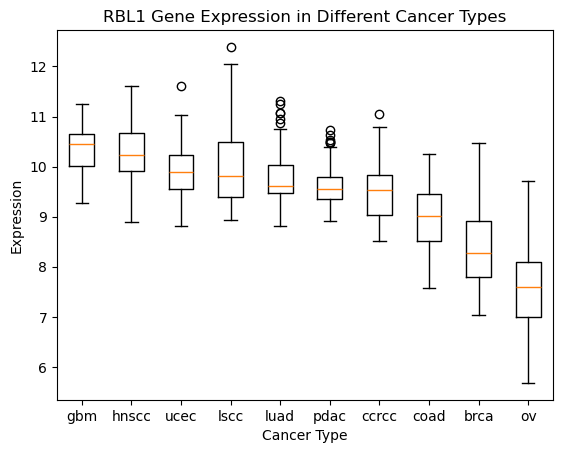

In [57]:
Compare_Transcriptomics(transcript_data_all_cancers,cancer_types,'RBL1')

In [85]:
cancer_types = ['luad','ccrcc','lscc','pdac','ucec','hnscc','gbm','coad','brca','ov']
data_accessors = {'luad':cptac.Luad(),'ccrcc':cptac.Ccrcc(),'lscc':cptac.Lscc(),'pdac':cptac.Pdac(),
                  'ucec':cptac.Ucec(),'hnscc':cptac.Hnscc(),'gbm':cptac.Gbm(),'coad':cptac.Coad(),
                  'brca':cptac.Brca(),'ov':cptac.Ov()}

In [60]:
transcript_data_all_cancers = []

for accessor in data_accessors:
    transcript = Access_CPTAC(data_accessors[accessor],True)
    transcript_data_all_cancers += [transcript]

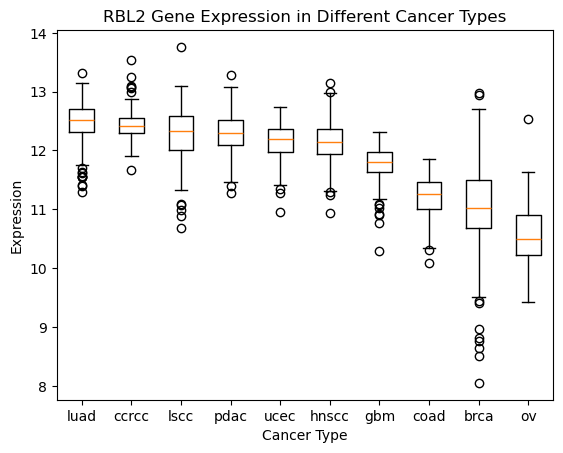

In [61]:
Compare_Transcriptomics(transcript_data_all_cancers,cancer_types,'RBL2')

In [95]:
cancer_types = ['ucec','gbm','hnscc','ov','luad','lscc','pdac','brca','coad','ccrcc']
data_accessors = {'ucec':cptac.Ucec(),'gbm':cptac.Gbm(),'hnscc':cptac.Hnscc(),
                  'ov':cptac.Ov(),'luad':cptac.Luad(),'lscc':cptac.Lscc(),'pdac':cptac.Pdac(),
                  'brca':cptac.Brca(),'coad':cptac.Coad(),'ccrcc':cptac.Ccrcc()}

In [96]:
proteomic_data_all_cancers = []

for accessor in data_accessors:
    proteome = Access_CPTAC(data_accessors[accessor],False)
    proteomic_data_all_cancers += [proteome]

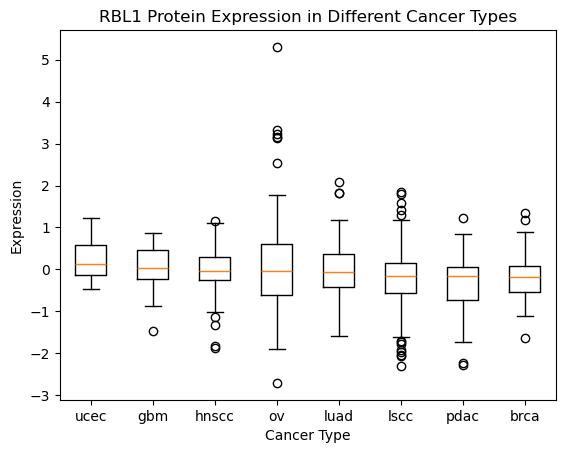

In [97]:
Compare_Proteomics(proteomic_data_all_cancers,cancer_types,'RBL1')


In [101]:
cancer_types = ['ov','lscc','gbm','hnscc','coad','pdac','brca','ccrcc','luad','ucec']
data_accessors = {'ov':cptac.Ov(),'lscc':cptac.Lscc(),'gbm':cptac.Gbm(),'hnscc':cptac.Hnscc(),
                  'coad':cptac.Coad(),'pdac':cptac.Pdac(),'brca':cptac.Brca(),
                  'ccrcc':cptac.Ccrcc(),'luad':cptac.Luad(),'ucec':cptac.Ucec()}

In [102]:
proteomic_data_all_cancers = []

for accessor in data_accessors:
    proteome = Access_CPTAC(data_accessors[accessor],False)
    proteomic_data_all_cancers += [proteome]

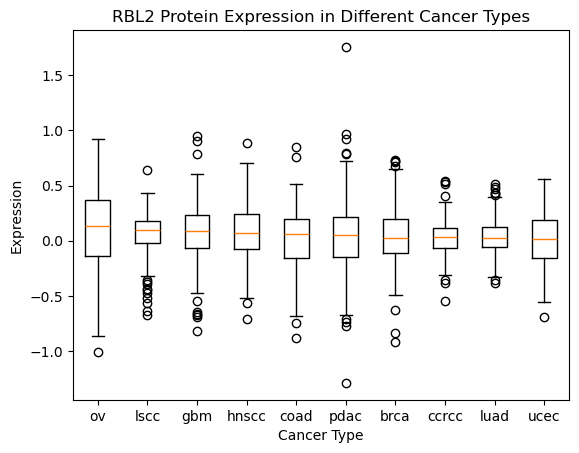

In [103]:
Compare_Proteomics(proteomic_data_all_cancers,cancer_types,'RBL2')